In [1]:
import numpy as np
import math
import matplotlib as mpl
from qiskit import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi
sim = Aer.get_backend('qasm_simulator')

The number of iterations to run in a Grover's algorithm is roughly $\sqrt{n}$ where n is the number of qbits. Running $H \otimes Oracle \otimes H \otimes Reflector \otimes H$ is one iteration. With increase in number of states to search for, the accuracy also drops with it.

In [2]:
n = 3
N = 2**n
rn = range(n)

The oracle here has CZ gate at (0,1) and (1,2). Due to this, the phase of 110 and 011 states will be $\pi$. But the phase of state 111 will be $2\pi$ which is effectively 0.

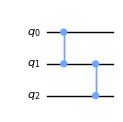

In [3]:
o = QuantumCircuit(n,name='oracle')
o.cz(range(n-1),range(1,n))
o.to_gate()
o.draw('mpl',scale=0.7)

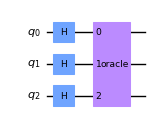

In [4]:
gc = QuantumCircuit(n)
gc.h(rn)
gc.append(o,rn)
gc.draw('mpl',scale=0.7)

The Inverter ( or the reflector) gate is constructed directly using its matrix representation.

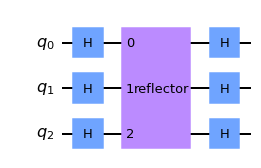

In [5]:
ref = QuantumCircuit(n,name='reflection')
mop = np.identity(N)*-1
mop[0][0]=1
op = qi.Operator(mop)
ref.h(rn)
ref.unitary(op,rn,label='reflector')
ref.h(rn)
ref.draw('mpl')

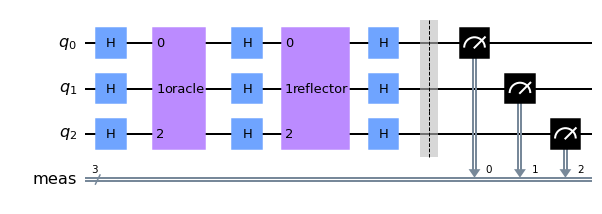

In [6]:
gc.compose(ref,inplace=True)
gc.measure_all()
gc.draw('mpl')

As expected, the algorithm found the correct solutions.

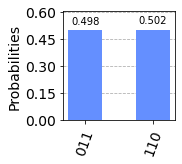

In [7]:
plot_histogram(
    execute(gc,sim,shots=1024).result().get_counts()
,figsize=(2,2))